# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [133]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [143]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
#     'https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}'

units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = base_url + city_data
    city_url = query_url + city
    response = requests.get(city_url).json()

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
       # Parse the JSON and retrieve data
       city_weather = response['name']

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = response['coord']['lat']
       city_lng = response['coord']['lon']
       city_max_temp = response['main']['temp_max']
       city_humidity = response['main']['humidity']
       city_clouds = response['clouds']['all']
       city_wind = response['wind']['speed']
       city_country = response['sys']['country']
       city_date = response['dt']

       # Append the City information into city_data list
       city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | arquitecto tomas romero pereira
Processing Record 4 of Set 1 | santa ines
Processing Record 5 of Set 1 | pimentel
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | belmonte
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | al jawf
Processing Record 12 of Set 1 | thunder bay
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | trondheim
Processing Record 18 of Set 1 | kulia village
City not found. Skipping...
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | college
Processing Record 22 of S

In [144]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [145]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,26.03,78,40,6.17,CK,1713183271
1,port-aux-francais,-49.3500,70.2167,4.77,93,99,13.36,TF,1713183271
2,arquitecto tomas romero pereira,-26.4833,-55.2500,22.52,96,100,3.50,PY,1713183272
3,santa ines,-3.6667,-45.3800,26.04,91,97,0.97,BR,1713183272
4,pimentel,-6.8367,-79.9342,20.16,83,0,7.72,PE,1713183273


In [182]:
# Export the City_Data into a csv
output_data = r'C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\python-api-challenge'
city_data_df.to_csv(f"{output_data}/cities.csv", columns=["City_ID", "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"], index=False)


In [183]:
# Read saved data
city_data_df = pd.read_csv(f"{output_data}/cities.csv")

# Display sample data

city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,avarua,-21.2078,-159.7750,26.03,78,40,6.17,CK,1713183271
1,1,port-aux-francais,-49.3500,70.2167,4.77,93,99,13.36,TF,1713183271
2,2,arquitecto tomas romero pereira,-26.4833,-55.2500,22.52,96,100,3.50,PY,1713183272
3,3,santa ines,-3.6667,-45.3800,26.04,91,97,0.97,BR,1713183272
4,4,pimentel,-6.8367,-79.9342,20.16,83,0,7.72,PE,1713183273


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

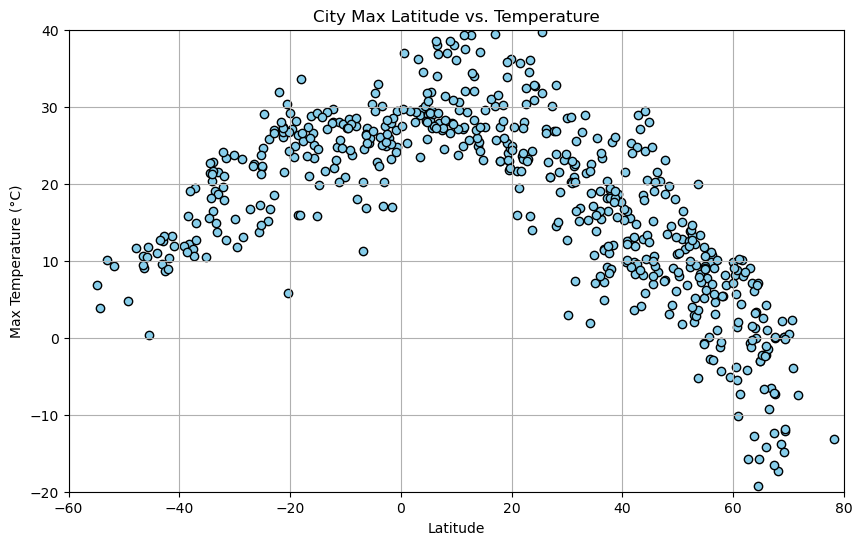

In [184]:
# Build scatter plot for latitude vs. temperature

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='skyblue', marker='o', edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (°C)')
ax.set_ylim(-20, 40)
ax.set_xlim(-60, 80)  # Set the initial x-axis limits

ax.set_title('City Max Latitude vs. Temperature')
ax.grid(True)

# Save the figure
output_data = r'C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\python-api-challenge'
plt.savefig(f"{output_data}/city_max_lat_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

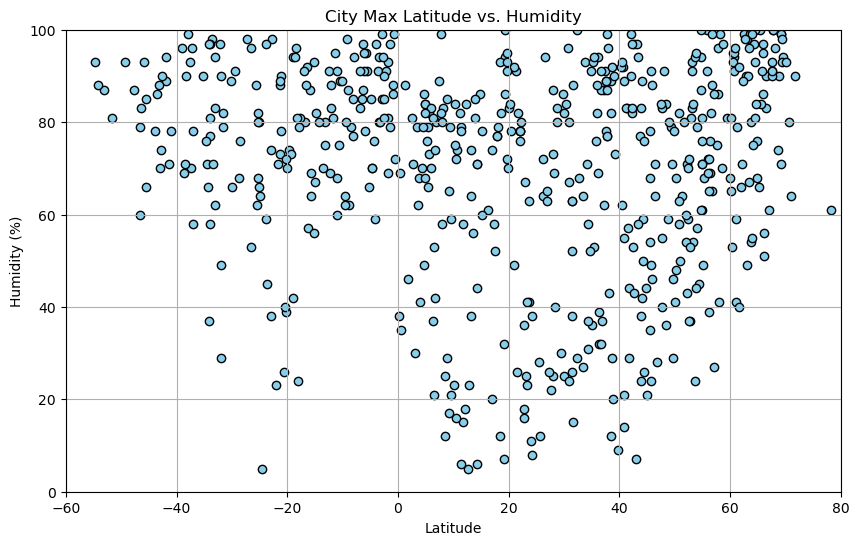

In [185]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='skyblue',marker='o', edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_ylim(0, 100)
ax.set_xlim(-60, 80)  
ax.set_title('City Max Latitude vs. Humidity')
ax.grid()


# Save the figure
output_data = r'C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\python-api-challenge'
plt.savefig(f"{output_data}/city_lat_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

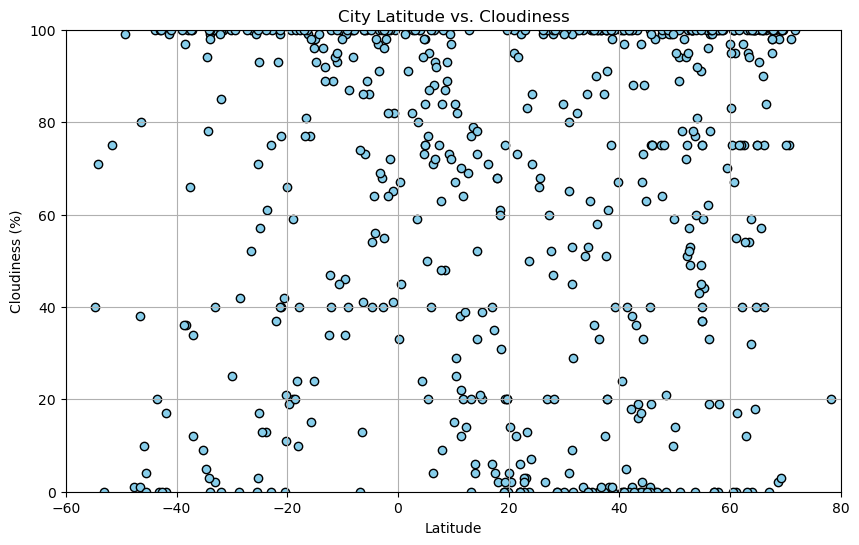

In [166]:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='skyblue', marker='o', edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_ylim(0, 100)
ax.set_xlim(-60, 80)  
ax.set_title('City Latitude vs. Cloudiness')
ax.grid()


# Save the figure
output_data = r'C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\python-api-challenge'
plt.savefig(f"{output_data}/city_lat_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

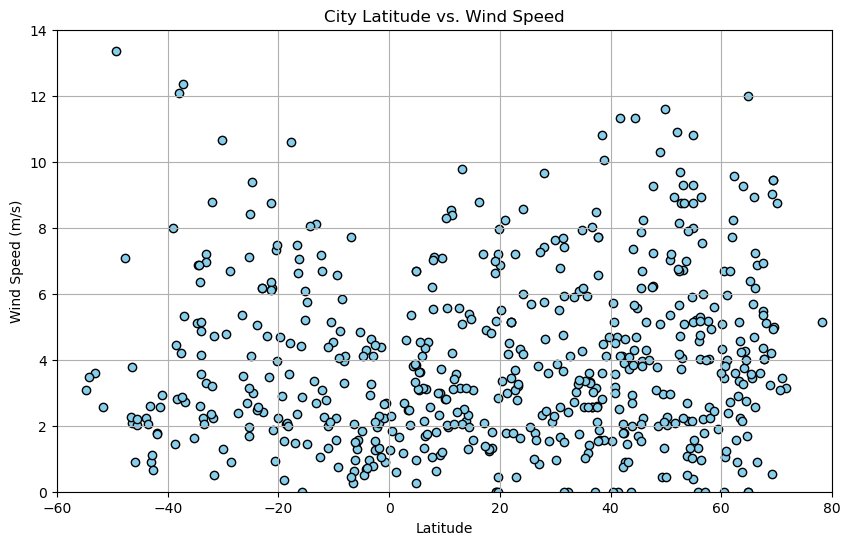

In [186]:
#Build the scatter plot for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='skyblue', marker='o', edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_ylim(0, 14)

ax.set_xlim(-60, 80)  

ax.set_title('City Latitude vs. Wind Speed')
ax.grid()


# Save the figure
output_data = r'C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\python-api-challenge'
plt.savefig(f"{output_data}/city_lat_wind speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [187]:
# Define a function to create Linear Regression plots

from scipy import stats
slope, intercept, r, p, se = stats.linregress(city_data_df['Lat'], city_data_df['Max Temp'])
print(slope)
print(intercept)

-0.18773437025463288
21.105973529300478


In [154]:
#regression_temps = [Lat * slope + intercept for Lat in city_data_df['Lat']]


In [188]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,5,thompson,55.7435,-97.8558,0.09,100,100,0.00,CA,1713183273
8,8,utrik,11.2278,169.8474,27.14,82,38,8.53,MH,1713183275
9,9,jamestown,42.0970,-79.2353,9.80,90,100,4.12,US,1713183275
10,10,al jawf,29.5000,38.7500,23.13,30,100,2.11,SA,1713183275
11,11,thunder bay,48.4001,-89.3168,3.11,84,21,3.79,CA,1713183192


In [189]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,avarua,-21.2078,-159.7750,26.03,78,40,6.17,CK,1713183271
1,1,port-aux-francais,-49.3500,70.2167,4.77,93,99,13.36,TF,1713183271
2,2,arquitecto tomas romero pereira,-26.4833,-55.2500,22.52,96,100,3.50,PY,1713183272
3,3,santa ines,-3.6667,-45.3800,26.04,91,97,0.97,BR,1713183272
4,4,pimentel,-6.8367,-79.9342,20.16,83,0,7.72,PE,1713183273


###  Temperature vs. Latitude Linear Regression Plot

In [253]:
#Linear regression on Northern Hemisphere
slope, intercept,r, p, se = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line = slope * northern_hemi_df['Lat'] + intercept
regression_line

-0.5617909941473676
36.97321665301767
-0.8672043532368717


5       5.657020
8      30.665540
9      13.323501
10     20.400382
11      9.782476
         ...    
571    29.548194
572    21.191609
573    33.405282
574    11.346109
576    14.046189
Name: Lat, Length: 404, dtype: float64

In [254]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.56x +36.97


The r-value is: 0.752043390272981


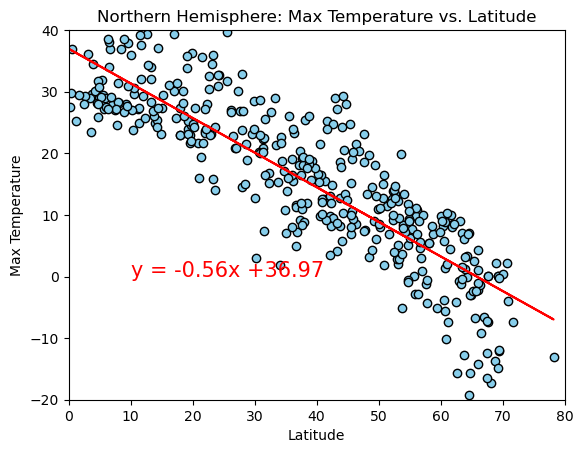

In [255]:

# Create a scatter plot with the linear regression line
fig, ax = plt.subplots()
ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='skyblue', marker='o', edgecolors='black')
ax.plot(northern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature')
ax.set_title('Northern Hemisphere: Max Temperature vs. Latitude')
ax.set_xlim(0, 80)
ax.set_ylim(-20, 40)
ax.annotate(line_eq,(10,0),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()


In [256]:
# Linear regression on Southern Hemisphere
slope, intercept,r, p, se = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line1 = slope * southern_hemi_df['Lat'] + intercept
regression_line1

0.3574874779738222
28.855136003247406
0.7400268982997436


0      21.273613
1      11.213129
2      19.387688
3      27.544337
4      26.411101
         ...    
545    27.934820
549    15.097767
553    21.119000
557    12.557925
575    13.852566
Name: Lat, Length: 173, dtype: float64

In [257]:
line_eq1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq1)

y = 0.36x +28.86


The r-value is: 0.547639810207139


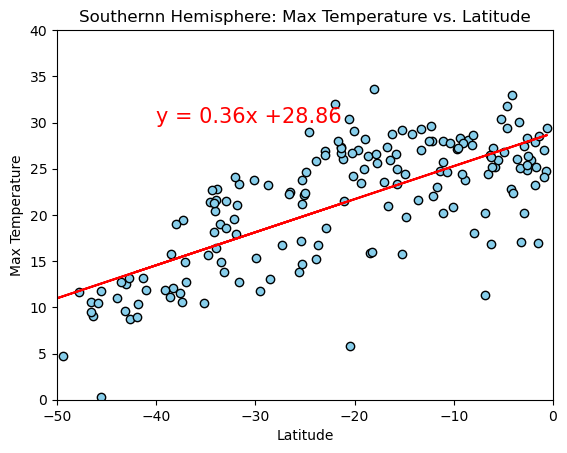

In [258]:

# Create a scatter plot with the linear regression line
fig, ax = plt.subplots()
ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='skyblue', marker='o', edgecolors='black')
ax.plot(southern_hemi_df['Lat'], regression_line1, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature')
ax.set_title('Southernn Hemisphere: Max Temperature vs. Latitude')
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)
ax.annotate(line_eq1,(-40,30),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Northern Hemisphere: As the latitude increases the max temp decreases.
# Southern Henisthere: As the latitude increases the max temp also increase.

### Humidity vs. Latitude Linear Regression Plot

In [266]:
slope, intercept,r, p, se = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line_humidity_n = slope * northern_hemi_df['Lat'] + intercept
regression_line_humidity_n

0.3274210921439946
54.23658026612503
0.26220240197561273


5      72.488178
8      57.912799
9      68.020026
10     63.895502
11     70.083794
         ...    
571    58.564007
572    63.434363
573    56.316032
574    69.172483
576    67.598831
Name: Lat, Length: 404, dtype: float64

In [267]:
line_eq_humidity_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_humidity_n)

y = 0.33x +54.24


The r-value is: 0.0687500996017808


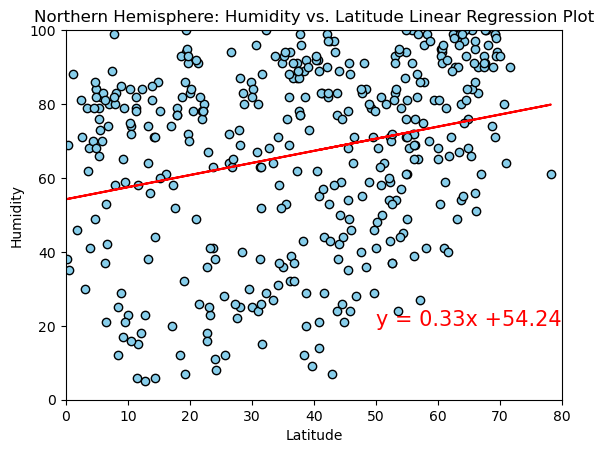

In [268]:
# Northern Hemisphere
fig, ax = plt.subplots()
ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='skyblue', marker='o', edgecolors='black')
ax.plot(northern_hemi_df['Lat'], regression_line_humidity_n, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity')
ax.set_title('Northern Hemisphere: Humidity vs. Latitude Linear Regression Plot')
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.annotate(line_eq_humidity_n,(50,20),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()


In [269]:
# Southern Hemisphere

slope, intercept,r, p, se = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line_humidity_s = slope * southern_hemi_df['Lat'] + intercept
regression_line_humidity_s

0.07198389028020498
79.6165378421015
0.06090952231051895


0      78.089918
1      76.064133
2      77.710167
3      79.352595
4      79.124406
         ...    
545    79.431223
549    76.846346
553    78.058785
557    76.334922
575    76.595612
Name: Lat, Length: 173, dtype: float64

In [270]:
line_eq_humidity_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_humidity_s)

y = 0.07x +79.62


The r-value is: 0.003709969908095606


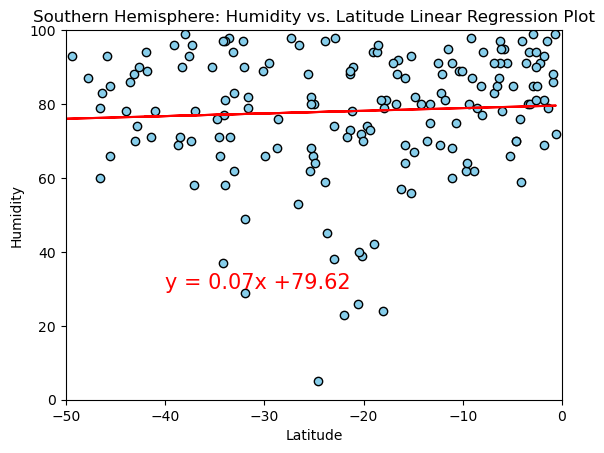

In [271]:
# Southern Hemisphere

# Create a scatter plot with the linear regression line
fig, ax = plt.subplots()
ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='skyblue', marker='o', edgecolors='black')
ax.plot(southern_hemi_df['Lat'], regression_line_humidity_s, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity')
ax.set_title('Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot')
ax.set_xlim(-50, 0)
ax.set_ylim(0, 100)
ax.annotate(line_eq_humidity_s,(-40,30),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Northern hemisphere: As the latitude increases the humidity also increases
#Southern Hemisthere: as the latitude increases the humidity is only slight increase.

### Cloudiness vs. Latitude Linear Regression Plot

In [272]:
# Northern Hemisphere
slope, intercept,r, p, se = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line_cloudiness_n = slope * northern_hemi_df['Lat'] + intercept
regression_line_cloudiness_n

0.28070841200819635
49.81536915850765
0.14774764528455558


5      65.463039
8      52.967107
9      61.632351
10     58.096267
11     63.401684
         ...    
571    53.525408
572    57.700918
573    51.598148
574    62.620389
576    61.271248
Name: Lat, Length: 404, dtype: float64

In [273]:
line_eq_cloudiness_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_cloudiness_n)

y = 0.28x +49.82


The r-value is: 0.02182936668713086


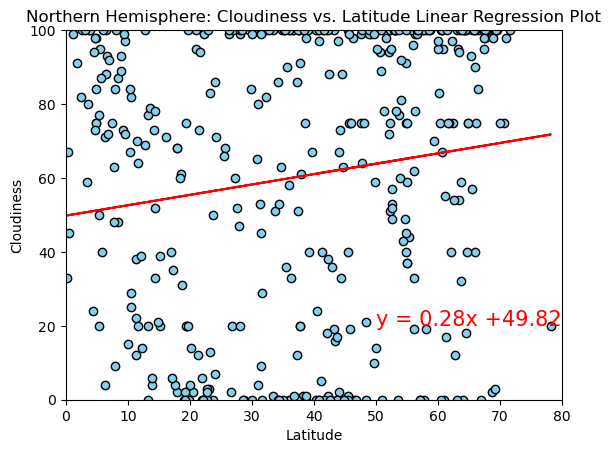

In [274]:
# Northern Hemisphere
fig, ax = plt.subplots()
ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='skyblue', marker='o', edgecolors='black')
ax.plot(northern_hemi_df['Lat'], regression_line_cloudiness_n, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')
ax.set_title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot')
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.annotate(line_eq_cloudiness_n,(50,20),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()


In [275]:
# Southern Hemisphere

slope, intercept,r, p, se = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line_cloudiness_s = slope * southern_hemi_df['Lat'] + intercept
regression_line_cloudiness_s

0.6763457782965452
80.19817198306838
0.2644090922308993


0      65.854366
1      46.820508
2      62.286304
3      77.718215
4      75.574199
         ...    
545    78.456987
549    54.170019
553    65.561846
557    49.364785
575    51.814172
Name: Lat, Length: 173, dtype: float64

In [276]:
line_eq_cloudiness_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_cloudiness_s)

y = 0.68x +80.2


The r-value is: 0.031022685081257717


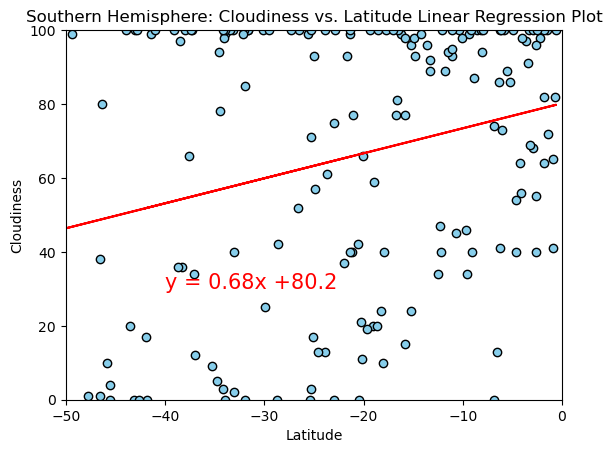

In [290]:
# Southern Hemisphere

# Create a scatter plot with the linear regression line
fig, ax = plt.subplots()
ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='skyblue', marker='o', edgecolors='black')
ax.plot(southern_hemi_df['Lat'], regression_line_cloudiness_s, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')
ax.set_title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot')
ax.set_xlim(-50, 0)
ax.set_ylim(0, 100)
ax.annotate(line_eq_cloudiness_s,(-40,30),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Northern hemisphere : As the latitude increases the cloudiness increases
# Southern hemisphere : As the latitude increases the cloudiness increases, see more ourlies for the regression

### Wind Speed vs. Latitude Linear Regression Plot

In [278]:
# Northern Hemisphere
slope, intercept,r, p, se = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line_windspeed_n = slope * northern_hemi_df['Lat'] + intercept
regression_line_windspeed_n

0.021392532087378867
3.2945895852734575
0.16213416973062642


5      4.487084
8      3.534781
9      4.195151
10     3.925669
11     4.329990
         ...   
571    3.577328
572    3.895540
573    3.430454
574    4.270448
576    4.167632
Name: Lat, Length: 404, dtype: float64

In [280]:
line_eq_windspeed_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_windspeed_n)

y = 0.02x +3.29


The r-value is: 0.026287488994239574


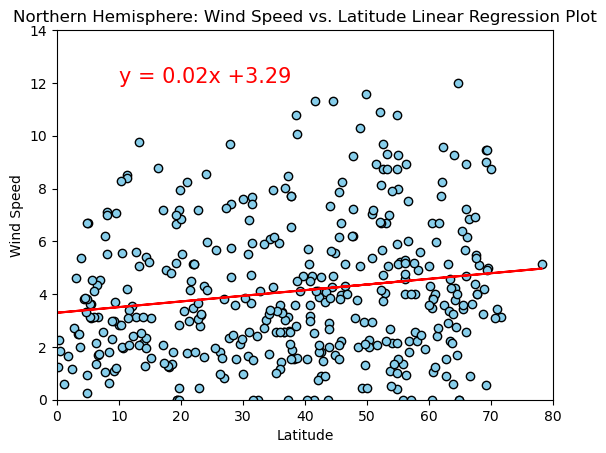

In [282]:
# Northern Hemisphere
fig, ax = plt.subplots()
ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='skyblue', marker='o', edgecolors='black')
ax.plot(northern_hemi_df['Lat'], regression_line_windspeed_n, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')
ax.set_title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot')
ax.set_xlim(0, 80)
ax.set_ylim(0, 14)
ax.annotate(line_eq_windspeed_n,(10,12),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()


In [284]:
# Southern Hemisphere

slope, intercept,r, p, se = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(slope)
print(intercept)
print(r)
#regression_line = slope * latitude + intercep
regression_line_windspeed_s = slope * southern_hemi_df['Lat'] + intercept
regression_line_windspeed_s

-0.03168626662220386
3.0321924612216518
-0.17613257813720243


0      3.704188
1      4.595910
2      3.871349
3      3.148376
4      3.248822
         ...   
545    3.113766
549    4.251591
553    3.717893
557    4.476712
575    4.361961
Name: Lat, Length: 173, dtype: float64

In [285]:
line_eq_windspeed_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_windspeed_s)

y = -0.03x +3.03


The r-value is: 0.031022685081257717


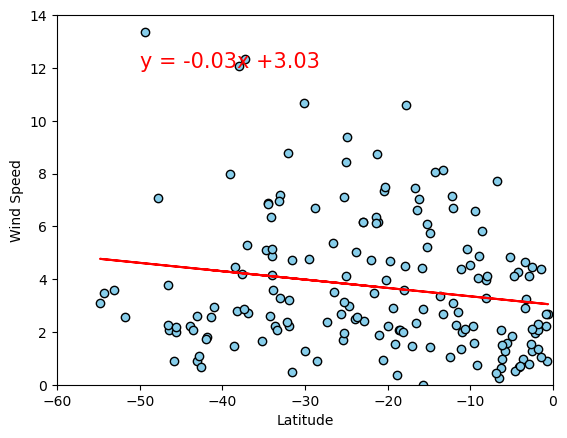

In [289]:
# Southern Hemisphere

# Create a scatter plot with the linear regression line
fig, ax = plt.subplots()
ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='skyblue', marker='o', edgecolors='black')
ax.plot(southern_hemi_df['Lat'], regression_line_windspeed_s, color='red', label='Linear Regression')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')
#ax.set_title('Southern Hemisphere: Wind Speed Linear Regression Plot')
ax.set_xlim(-60, 0)
ax.set_ylim(0, 14)
ax.annotate(line_eq_windspeed_s,(-50,12),fontsize=15,color='red')

# Print r value
print(f"The r-value is: {r**2}")
#Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Northern Hemisphere: As the latitude increases the wind speed is increasing.
#Southern Hemisphere: As the latitude increaces the wind speed is decreasing.